In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import utils.customJpegCompressor as JpegCompressor
from utils.blockJpeg import d1, d2, d3, round_op, halfup, block_jpeg

## Loading image

In [2]:
data_folder = '../data/'
pictures = os.listdir(data_folder)

img = cv2.imread(data_folder + pictures[0], 0)

Q_VALUES = ['Q10', 'Q50', 'Q90', 'Q1']

In [3]:
def showImage(img):
    plt.figure(figsize=(15,15))
    plt.imshow(img,cmap='gray')
    plt.xticks([]),plt.yticks([])
    plt.show()

In [4]:
def slice_image(image):
    height, width = image.shape
    sliced = []  # new list for 8x8 sliced image
    # dividing 8x8 parts
    currY = 0  # current Y index
    for i in range(8, height + 1, 8):
        currX = 0  # current X index
        for j in range(8, width + 1, 8):
            sliced.append(image[currY:i, currX:j])
            currX = j
        currY = i
    return sliced

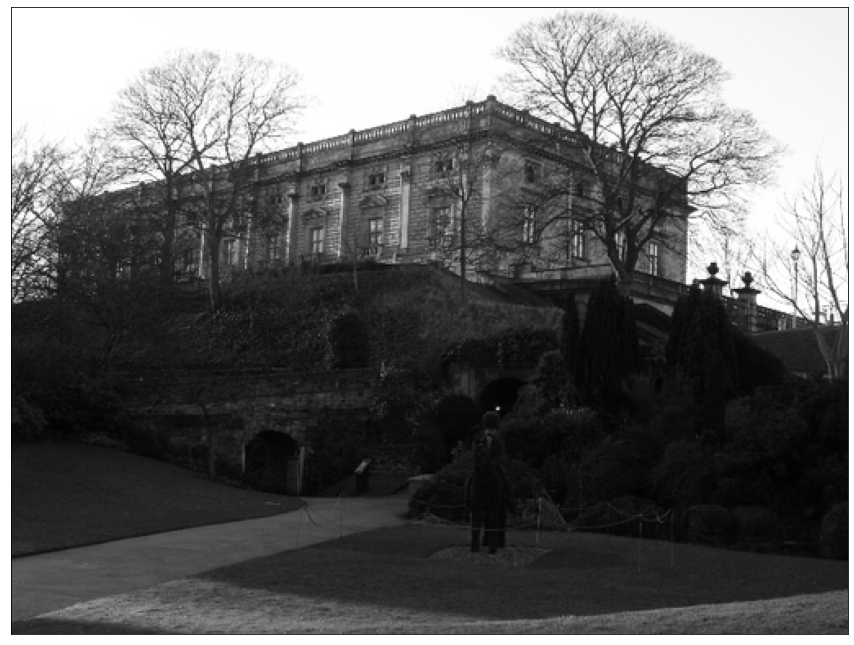

In [5]:
showImage(img)
sliced = slice_image(img)

## Compress with blockJpeg algorithm
### Define parameters

In [6]:
block = sliced[1568]

d = d3
s = 2**0
sh = np.array([2**11]*8)
sv = np.array([2**15]*8)
Q = JpegCompressor.get_quantification_matrix(50)
fq = round_op
f2 = round_op
fe = halfup
fo = halfup
fs = round_op

In [7]:
b_d3 = block_jpeg(block, d3, s, sh, sv, Q, fq, f2, fe, fo, fe)
b_d2 = block_jpeg(block, d2, s, sh, sv, Q, fq, f2, fe, fo, fe)
b_d1 = block_jpeg(block, d1, s, sh, sv, Q, fq, f2, fe, fo, fe)

In [8]:
b_d1[0][0] = 0
b_d2[0][0] = 0
b_d3[0][0] = 0

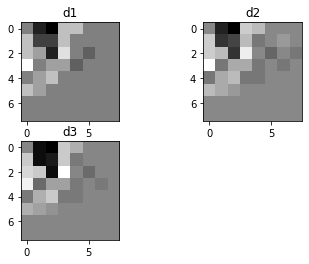

In [9]:
plt.subplot(221)
plt.imshow(b_d1, cmap="gray")
plt.title("d1")

plt.subplot(222)
plt.imshow(b_d2, cmap="gray")
plt.title("d2")

plt.subplot(223)
plt.imshow(b_d3, cmap="gray")
plt.title("d3")

plt.show()
